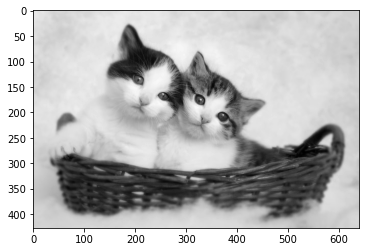

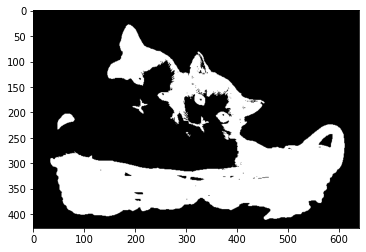

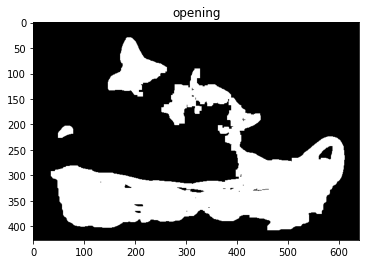

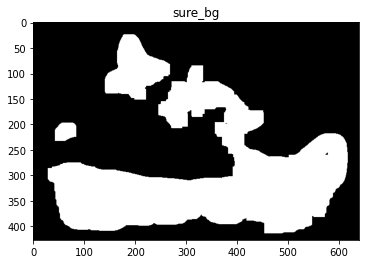

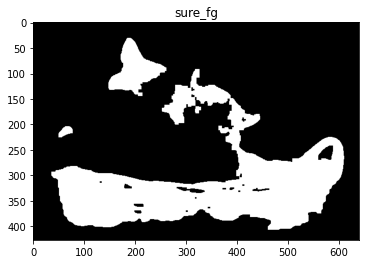

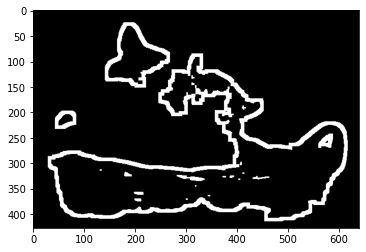

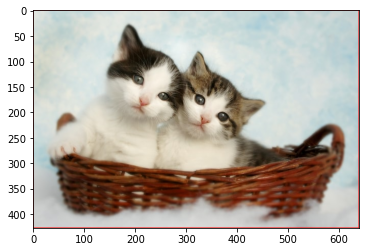

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 


img = cv2.imread('../Resources/Photos/cats 2.jpg')

rgbimg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# gray = cv2.cvtColor(rgbimg,cv2.COLOR_RGB2GRAY)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(rgbimg)
plt.show()

ret, thresh = cv2.threshold(gray,40,240,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh,cmap='gray')
plt.show()

# noise removal
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

plt.title('opening')
plt.imshow(opening,cmap='gray')
plt.show()
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

plt.title('sure_bg')
plt.imshow(sure_bg,cmap='gray')
plt.show()
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.03*dist_transform.max(),255,0)
plt.title('sure_fg')
plt.imshow(sure_fg,cmap='gray')
plt.show()

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown,cmap='gray')
plt.show()


# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(rgbimg,markers)
rgbimg[markers == -1] = [255,0,0]


plt.imshow(rgbimg)
plt.show()



